<a href="https://colab.research.google.com/github/omnianasser449-lab/Marketing-Analytics-Portfolio/blob/main/tips_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd

df_tips = sns.load_dataset('tips')

print(df_tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
print(df_tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
df_cleaned = pd.get_dummies(df_tips, columns=['sex', 'day', 'time', 'smoker'])

print(df_cleaned.head())

   total_bill   tip  size  sex_Male  sex_Female  day_Thur  day_Fri  day_Sat  \
0       16.99  1.01     2     False        True     False    False    False   
1       10.34  1.66     3      True       False     False    False    False   
2       21.01  3.50     3      True       False     False    False    False   
3       23.68  3.31     2      True       False     False    False    False   
4       24.59  3.61     4     False        True     False    False    False   

   day_Sun  time_Lunch  time_Dinner  smoker_Yes  smoker_No  
0     True       False         True       False       True  
1     True       False         True       False       True  
2     True       False         True       False       True  
3     True       False         True       False       True  
4     True       False         True       False       True  


In [ ]:
print(df_cleaned.isnull().sum())
df_cleaned.describe()

total_bill     0
tip            0
size           0
sex_Male       0
sex_Female     0
day_Thur       0
day_Fri        0
day_Sat        0
day_Sun        0
time_Lunch     0
time_Dinner    0
smoker_Yes     0
smoker_No      0
dtype: int64


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
y = df_cleaned['tip']
x = df_cleaned.drop('tip', axis= 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state =42)
print("ready to train on ", len(x_train), "tables.")

ready to train on  195 tables.


In [ ]:
from sklearn.linear_model import LinearRegression

tipping_model = LinearRegression()
tipping_model.fit(x_train, y_train)
predictions = tipping_model.predict(x_test)


In [ ]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(y_test, predictions)
print(f"the guess is of by: ${error:.2f}")

the guess is of by: $0.67


In [ ]:
coefficients = pd.DataFrame({'feature': x.columns, 'weight' : tipping_model.coef_})
print(coefficients.sort_values(by= 'weight', ascending = False))

        feature    weight
1          size  0.233484
5       day_Fri  0.104075
11    smoker_No  0.096177
0    total_bill  0.094700
7       day_Sun  0.053282
8    time_Lunch  0.047479
2      sex_Male  0.014410
3    sex_Female -0.014410
9   time_Dinner -0.047479
4      day_Thur -0.075646
6       day_Sat -0.081710
10   smoker_Yes -0.096177


In [ ]:
top_features = ['size', 'total_bill', 'day_Fri', 'smoker_No']
x_best = df_cleaned[top_features]

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_best, y, test_size=0.2, random_state=42)
model_best = LinearRegression()
model_best.fit(x_train_b, y_train_b)

LinearRegression()

In [ ]:
new_predictions = model_best.predict(x_test_b)
new_error = mean_absolute_error(y_test_b, new_predictions)

print(f"Old Error: $0.67")
print(f"New Error with only top features: ${new_error:.2f}")

Old Error: $0.67
New Error with only top features: $0.67


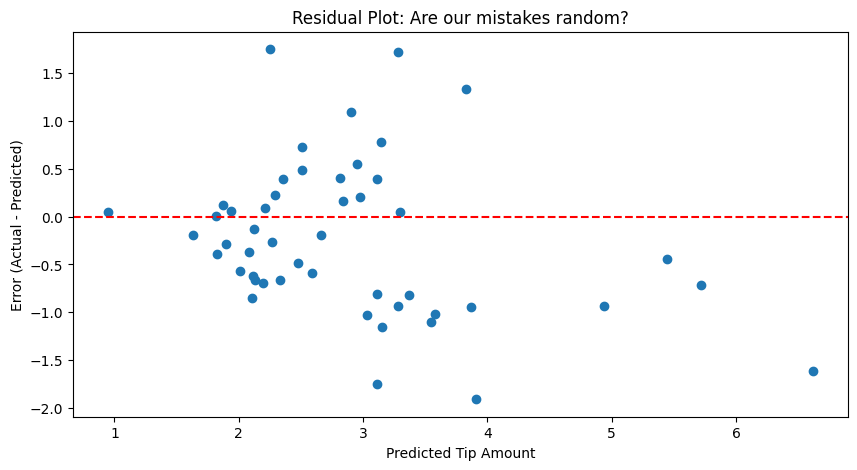

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test_b - new_predictions

plt.figure(figsize=(10,5))
plt.scatter(new_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot: Are our mistakes random?')
plt.xlabel('Predicted Tip Amount')
plt.ylabel('Error (Actual - Predicted)')
plt.show()